In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = "../content/creditcard.csv"
df = pd.read_csv(file_path)

In [3]:
df.shape, df.columns
df.head()
df.info()
df['Class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95162 entries, 0 to 95161
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    95162 non-null  int64  
 1   V1      95162 non-null  float64
 2   V2      95162 non-null  float64
 3   V3      95162 non-null  float64
 4   V4      95162 non-null  float64
 5   V5      95162 non-null  float64
 6   V6      95162 non-null  float64
 7   V7      95162 non-null  float64
 8   V8      95162 non-null  float64
 9   V9      95162 non-null  float64
 10  V10     95162 non-null  float64
 11  V11     95162 non-null  float64
 12  V12     95162 non-null  float64
 13  V13     95161 non-null  float64
 14  V14     95161 non-null  float64
 15  V15     95161 non-null  float64
 16  V16     95161 non-null  float64
 17  V17     95161 non-null  float64
 18  V18     95161 non-null  float64
 19  V19     95161 non-null  float64
 20  V20     95161 non-null  float64
 21  V21     95161 non-null  float64
 22

,count
Class,
0.0,94944
1.0,217


In [4]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [5]:
col,row = df.shape
col,row

(95162, 31)

In [6]:
# gives fraction of frauds
df['Class'].mean()

np.float64(0.002280345940038461)

Text(0.5, 1.0, 'Amount (log scale)')

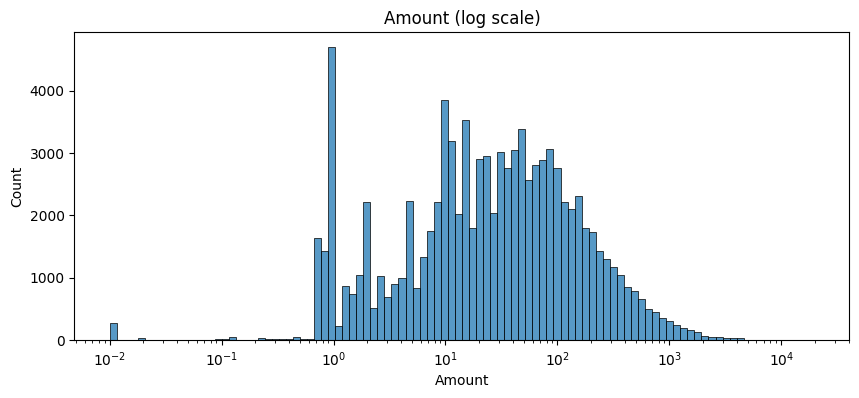

In [7]:


plt.figure(figsize=(10,4))
sns.histplot(df['Amount'], bins=100, log_scale=True)
plt.title('Amount (log scale)')


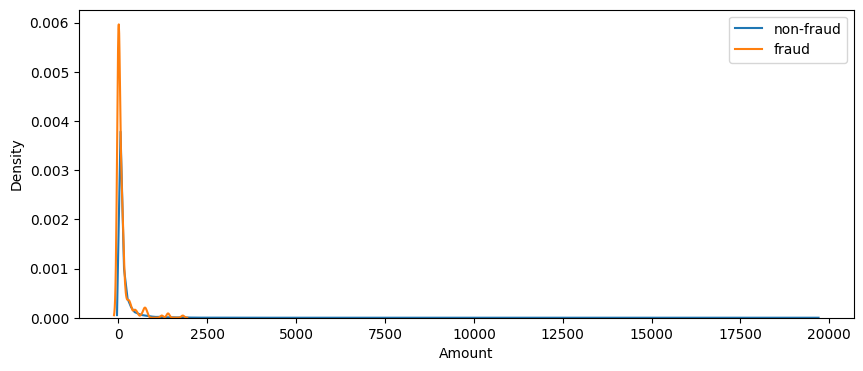

In [8]:

plt.figure(figsize=(10,4))
sns.kdeplot(df.loc[df.Class==0,'Amount'], label='non-fraud', bw_adjust=0.5)
sns.kdeplot(df.loc[df.Class==1,'Amount'], label='fraud', bw_adjust=0.5)
plt.legend()


In [9]:
df.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])


In [11]:
df['Time_scaled'] = scaler.fit_transform(df[['Time']])


In [12]:
df = df.drop(['Time', 'Amount'], axis=1)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


model = LogisticRegression(class_weight='balanced')


In [16]:
df = df.dropna(subset=['Class'])


In [17]:
df['Class'].isnull().sum()


np.int64(0)

In [18]:
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df['Class']

sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y)


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

pred = model.predict(X_test)
probs = model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("AUC:", roc_auc_score(y_test, probs))


[[18635   355]
 [    6    37]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     18990
         1.0       0.09      0.86      0.17        43

    accuracy                           0.98     19033
   macro avg       0.55      0.92      0.58     19033
weighted avg       1.00      0.98      0.99     19033

AUC: 0.9793483718480963


In [23]:
import pickle

# Save model
pickle.dump(model, open("model.pkl", "wb"))

# Save scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))

print("model.pkl and scaler.pkl saved!")


model.pkl and scaler.pkl saved!
